In [1]:
import pandas as pd
import statistics as stats
from scipy.stats import pearsonr
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, csv

In [3]:
cells = {
 'BG02ES',
 'BJ',
 'GM06990',
 'GM12801',
 'GM12812',
 'GM12813',
 'GM12878',
 'HUVEC',
 'HeLaS3',
 'HepG2',
 'IMR90',
 'K562',
 'MCF7',
 'NHEK'}

In [18]:
kmer=13

headers = ['KMERbp_almost_nulls.txt.formatted']
headers2df = {mut:None for mut in headers}

for mut in headers:
    avg_df = pd.DataFrame()
    for c in cells:
        header = mut.replace("KMER", str(kmer))
        filename=f"tables/{c}_replitime.deciles.bed.i_c.hg19_{header}"
        bpD = {bins:[] for bins in range(1,11)}
        occsD = {bins:[] for bins in range(1,11)}
        ### Create list of bps and occs counts for each bin 
        with open(filename, 'r') as infile:
            reader = csv.reader(infile, delimiter="\t")
            for line in reader:
                if line[5] == 0:
                    pass
                else:
                    bp = int(line[2])-int(line[1])
                    occs = int(line[5])
                    stage = int(line[4])
                    bpD[stage].append(bp)
                    occsD[stage].append(occs)
        densityD = {k:[] for k in range(1,11)}
        for binstage in range(1,11):
            sum_bp = sum(bpD[binstage])
            sum_occs = sum(occsD[binstage])
            densityD[binstage] = 1000*(sum_occs/sum_bp)
        avg_df[c] = pd.Series(densityD)
    headers2df[mut] = avg_df

In [19]:
headers2df['KMERbp_almost_nulls.txt.formatted']

,IMR90,GM12801,GM12812,BJ,HUVEC,HeLaS3,BG02ES,HepG2,GM06990,NHEK,GM12878,K562,GM12813,MCF7
1,41.489888,41.774866,42.938066,50.946384,41.504693,44.956422,42.984254,38.968094,41.009144,40.740245,40.636864,40.661387,41.244264,43.497841
2,63.872470,63.844558,64.014973,64.772066,66.478537,66.946584,62.700146,61.229995,62.900865,63.240529,61.671835,60.235100,64.457278,64.093449
3,71.890020,68.464241,69.103829,72.607289,71.786519,70.495965,68.724085,66.411800,66.983738,69.707076,67.811112,66.178472,69.441477,66.232209
4,77.979903,72.784783,73.969032,77.740908,76.383860,73.181774,74.210381,72.087702,73.865985,75.138560,73.250527,74.290973,73.540908,70.214175
5,81.064408,79.670843,80.318952,81.731428,80.053273,76.966956,80.418394,79.701741,80.546041,80.402437,80.745752,81.328592,79.102370,76.022684
6,88.246837,86.346060,88.374090,86.907613,82.991535,83.597874,86.866325,85.976727,87.188089,85.051291,87.149285,86.809719,86.005987,82.854086
7,90.186238,91.514469,93.156645,90.481172,89.864723,90.481129,94.657398,93.239713,93.994329,91.665322,93.323260,94.017606,93.108495,90.778052
8,97.195130,97.737328,98.775054,97.930391,95.547988,96.360393,101.742668,101.288594,99.437303,97.125852,100.309758,100.079839,98.894406,96.571853
9,107.604115,109.142585,105.773133,108.919692,105.564992,105.806793,107.298320,111.935657,108.497219,108.097504,109.212064,108.564994,107.231342,108.815003
10,123.027587,131.436465,125.981404,122.540546,130.794091,132.926057,125.721939,132.598769,126.415890,134.352605,127.591139,133.677538,128.258752,143.343037


In [20]:
base = headers2df['KMERbp_almost_nulls.txt.formatted']
print(list(base.mean(axis=1)))
pearsonr(range(1, 11), list(base.mean(axis=1)))

[42.38231512159827, 63.604170404081636, 68.98841651221451, 74.18853363499836, 79.86241922955584, 86.02610844093364, 92.17632499709866, 98.49975408084028, 108.0331009689068, 129.90470139994324]


(0.9740010912317179, 1.9372433188848916e-06)

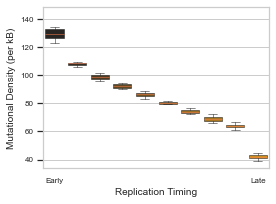

In [21]:
sns.set(style="whitegrid", 
        rc={'figure.figsize':(4,3)})

## To average the bins for all the celltypes
replibin2color = {k:None for k in range(0,11)}
for idx, hexcode in enumerate(sns.dark_palette("orange", reverse=True, n_colors=11).as_hex()):
    replibin2color[idx] = hexcode
replibin2color

df = headers2df['KMERbp_almost_nulls.txt.formatted']
plotdf = df.reset_index().melt(id_vars='index')
plotdf.columns = ['bin', 'cell', 'density']
g1 = sns.boxplot(data = plotdf, x='bin', y='density', 
                # color='maroon',
                palette=replibin2color, 
                width=0.8, 
                linewidth=0.5,
                fliersize=0,
                medianprops={"color": "coral"})

g1.set_ylabel('Mutational Density (per kB)', fontsize=10)    
g1.set_xlabel('Replication Timing', fontsize=10)
g1.tick_params(labelsize=8, bottom=False, left=True)
plt.gca().invert_xaxis()
g1.set_xticklabels(["Late", "", "", "", "", "", "", "", "", "Early"])

plt.title("")
plt.tight_layout()
plt.show()
plt.close()